In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:

# Load dataset
df = fetch_california_housing(as_frame=True)
display(df.data)
display(df.target)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
print(df.feature_names)
print(df.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


In [13]:

dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Get target name
t_name = dataset.target_names[0]

# Add target column
df[t_name] = dataset.target

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
x = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1200)

In [85]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
y_pred = model.predict(x_test)

In [88]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred) # difference between actual values and predicted values
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)  # score between actual and predicted (accuracy)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score (Accuracy): {r2:.2f}")
print(f"mean_absolute_error: {mae:.2f}")
print(f"Model Accuracy: {r2*100:.2f} %") # 62% at 1200

Mean Squared Error: 0.49
R2 Score (Accuracy): 0.62
mean_absolute_error: 0.52
Model Accuracy: 62.01 %


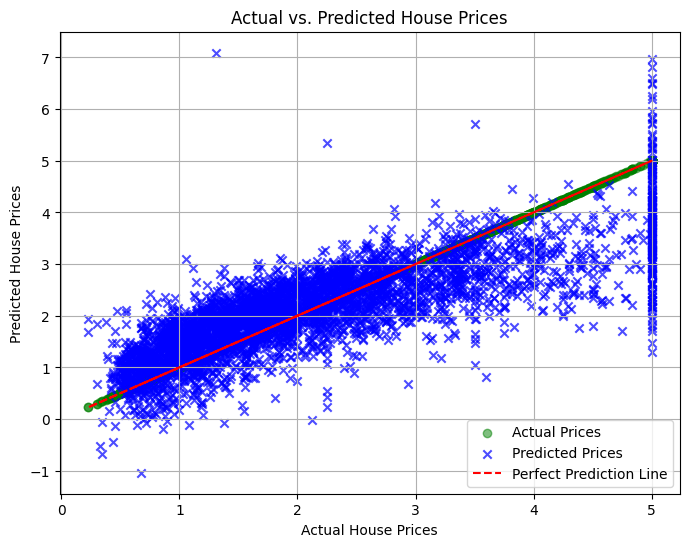

In [89]:
plt.figure(figsize=(8, 6))

# Scatterplot of actual house prices
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual Prices', marker='o')

# Scatterplot of predicted house prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted Prices', marker='x')

# Plot a 45-degree line to represent perfect predictions where predicted equals actual
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)

# Add a legend to differentiate between actual and predicted prices
plt.legend()

# Display the plot
plt.show()
